In [2]:
import keras 
import numpy as n
import pandas as p
import cv2 as c
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
d=p.read_csv('C:/Users/mayan/BTP/Skin-cancer-lesion-detection-master/HAM10000_metadata.csv')

In [62]:
d.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [7]:
pa='C:/Users/mayan/BTP/Skin-cancer-lesion-detection-master/images'
#image size 450,600,3 resized to 100,100,3
l=[]
for x in d.iterrows():
    t=x[1][1]+'.jpg'
    tp=os.path.join(pa,t)
    im=c.imread(tp)
    im=c.cvtColor(im,c.COLOR_BGR2RGB)
    im=c.resize(im,(100,100))
    l.append([im,x[1][2]])

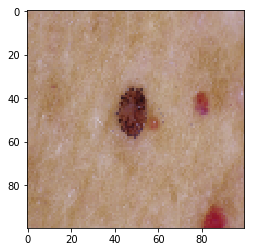

In [10]:
plt.imshow(im)
plt.show()

In [29]:
im=c.cvtColor(im,c.COLOR_RGB2GRAY)
im=c.resize(im,(100,100))

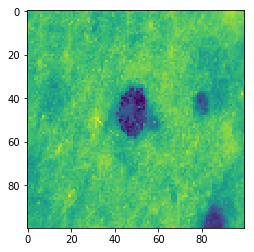

In [30]:
plt.imshow(im)
plt.show()

In [31]:
len(l)

10015

In [32]:
x=[]
y=[]
for a,b in l:
    x.append(a)
    y.append(b)

In [33]:
x=n.asarray(x)
y=n.asarray(y)

In [34]:
import random
random.shuffle(l)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [37]:
k=LabelEncoder()

In [38]:
k.fit(y)

LabelEncoder()

In [39]:
k.classes_

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype='<U5')

In [40]:
y=k.transform(y)

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
xtr.shape

(8012, 100, 100, 3)

In [45]:
xte.shape

(2003, 100, 100, 3)

In [46]:
ytr.shape

(8012,)

In [47]:
yte.shape

(2003,)

In [48]:
from keras.utils import to_categorical

In [49]:
ytr=to_categorical(ytr)
yte=to_categorical(yte)

In [50]:
xtr=xtr/255

In [51]:
xte=xte/255

In [53]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [54]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.20))
model.add(Flatten())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(Dense(256, activation='linear'))
model.add(Dense(7, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       73856     
__________

In [56]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
seqm=model.fit(xtr,ytr,batch_size=128,epochs=10,validation_data=(xte,yte))

Train on 8012 samples, validate on 2003 samples
Epoch 1/10
8012/8012 [==============================] - 348s 43ms/step - loss: 1.1167 - acc: 0.6578 - val_loss: 1.2721 - val_acc: 0.6745
Epoch 2/10
8012/8012 [==============================] - 442s 55ms/step - loss: 0.9557 - acc: 0.6687 - val_loss: 1.1965 - val_acc: 0.6520
Epoch 3/10
8012/8012 [==============================] - 519s 65ms/step - loss: 0.8980 - acc: 0.6776 - val_loss: 0.9437 - val_acc: 0.6820
Epoch 4/10
8012/8012 [==============================] - 499s 62ms/step - loss: 0.8380 - acc: 0.6925 - val_loss: 0.8875 - val_acc: 0.7064
Epoch 5/10
8012/8012 [==============================] - 418s 52ms/step - loss: 0.7687 - acc: 0.7157 - val_loss: 0.8195 - val_acc: 0.6910
Epoch 6/10
8012/8012 [==============================] - 394s 49ms/step - loss: 0.7196 - acc: 0.7335 - val_loss: 0.8225 - val_acc: 0.6860
Epoch 7/10
8012/8012 [==============================] - 379s 47ms/step - loss: 0.7005 - acc: 0.7399 - val_loss: 0.8133 - val_acc: 

In [57]:
test_loss,test_acc = model.evaluate(xte,yte)
test_loss,test_acc

2003/2003 [==============================] - 23s 11ms/step


(0.7295493535470557, 0.719920119879785)

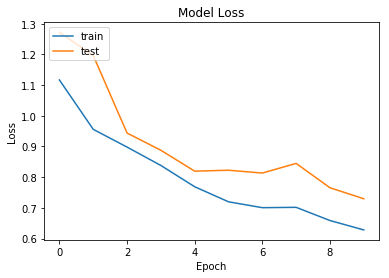

In [60]:
plt.plot(seqm.history['loss'])
plt.plot(seqm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

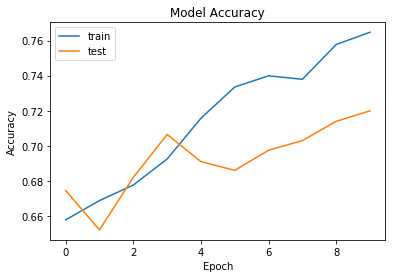

In [61]:
plt.plot(seqm.history['acc'])
plt.plot(seqm.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [9]:
nim=c.imread('C:/Users/mayan/BTP/Skin-cancer-lesion-detection-master/images/ISIC_0024354.jpg',1)

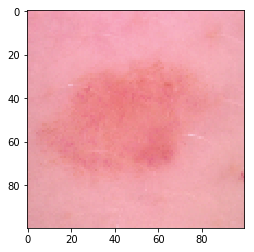

In [13]:
nim=c.cvtColor(nim,c.COLOR_BGR2RGB)
nim=c.resize(nim,(100,100))
plt.imshow(nim)
plt.show()